# Mall Customer Segmentation 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
mall_df = pd.read_csv("Mall_Customers.csv")

In [4]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
mall_df.groupby('Gender')['Spending Score (1-100)'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [8]:
corr1 = mall_df.corr()

In [9]:
corr1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


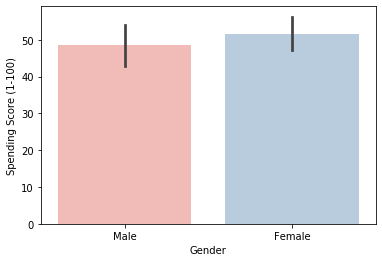

In [10]:
sns.barplot(x = mall_df['Gender'] , y = mall_df['Spending Score (1-100)'] , palette= 'Pastel1')

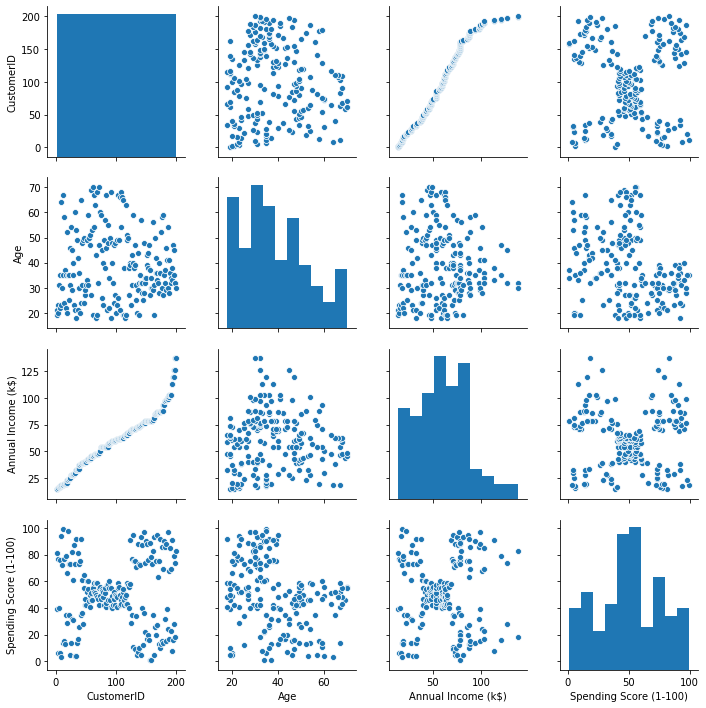

In [11]:
sns.pairplot(mall_df)

In [12]:
mall_df['Age'].nunique()

51

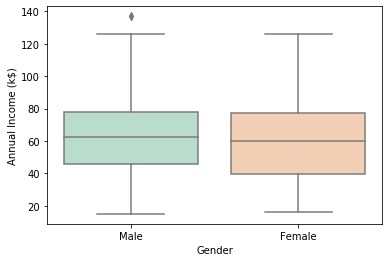

In [13]:
sns.boxplot(x = mall_df['Gender'], y =mall_df['Annual Income (k$)'] ,palette = 'Pastel2')

Text(0.5, 0, 'Age')

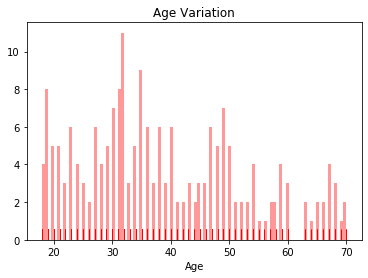

In [16]:
sns.distplot(mall_df['Age'],kde= False , bins = 100  ,rug= True ,color ='red' )
plt.title('Age Variation')
plt.xlabel('Age')

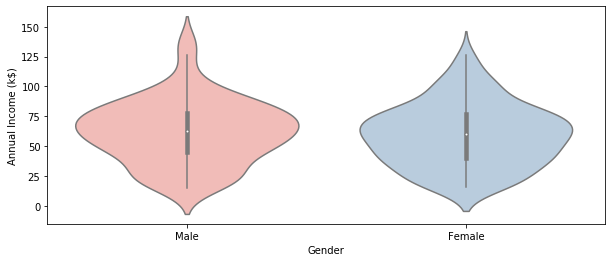

In [17]:
plt.figure(figsize=(10,4))
sns.violinplot(x = mall_df['Gender'] , y = mall_df['Annual Income (k$)'] , data = mall_df, palette = 'Pastel1')

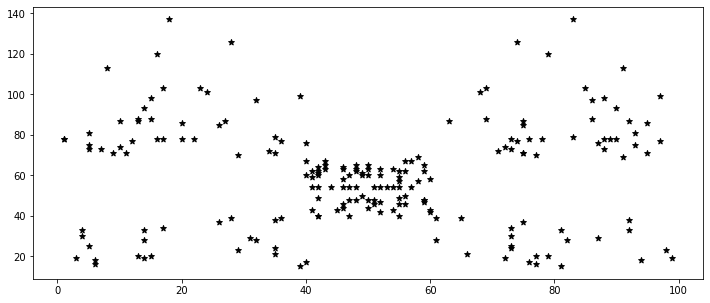

In [18]:
plt.figure(figsize = (12,5))
plt.scatter(x= mall_df['Spending Score (1-100)'] , y =mall_df['Annual Income (k$)'] ,c ='black',marker ='*')

In [19]:
age18_25 = mall_df['Age'][(mall_df['Age'] >= 18 ) & (mall_df['Age'] <= 25 )]
age26_35 = mall_df['Age'][(mall_df['Age'] >= 26 ) & (mall_df['Age'] <= 35 )]
age36_45 = mall_df['Age'][(mall_df['Age'] >= 30 ) & (mall_df['Age'] <= 45 )]
age46_55 = mall_df['Age'][(mall_df['Age'] >= 46 ) & (mall_df['Age'] <= 55 )]
age_above55 =  mall_df['Age'][mall_df['Age'] >= 56]

Text(0, 0.5, 'Number')

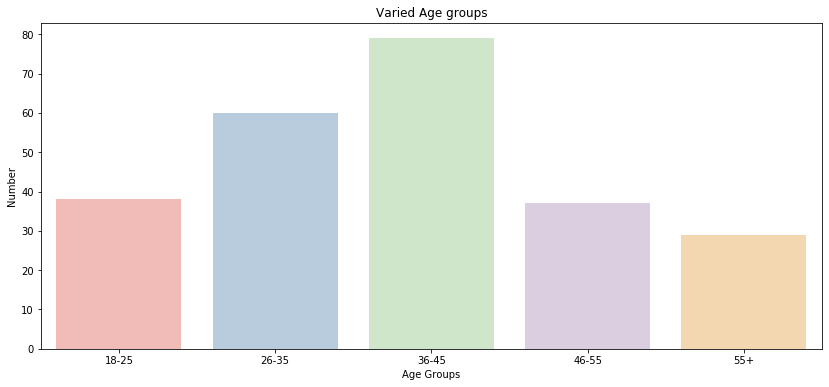

In [20]:
x = ['18-25' , '26-35' , '36-45' , '46-55' , '55+']
y = [len(age18_25) , len(age26_35) , len(age36_45) , len(age46_55) , len(age_above55)]

plt.figure(figsize=(14,6))
sns.barplot(x=x , y=y , palette ='Pastel1')
plt.title('Varied Age groups')
plt.xlabel('Age Groups')
plt.ylabel('Number')


In [21]:
spend1_20 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"] >= 1) & (mall_df["Spending Score (1-100)"] <= 20)]
spend21_40 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"] >= 21) & (mall_df["Spending Score (1-100)"] <= 40)]
spend41_60 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"] >= 41) & (mall_df["Spending Score (1-100)"] <= 60)]
spend61_80 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"] >= 61) & (mall_df["Spending Score (1-100)"] <= 80)]
spend81_100 = mall_df["Spending Score (1-100)"][(mall_df["Spending Score (1-100)"] >= 81) & (mall_df["Spending Score (1-100)"] <= 100)]

sx = ['1-20' , '21-40' , '41-60' , '61-80' , '81-100']
sy = [len(spend1_20) , len(spend21_40) ,len(spend41_60) , len(spend61_80) ,len(spend81_100)]




Text(0, 0.5, 'Number of Customer Having the Score')

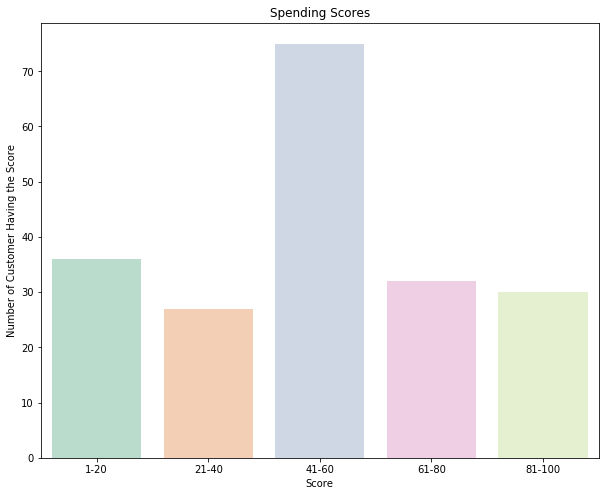

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x=sx , y=sy , palette = 'Pastel2')
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")

Text(0.5, 0, 'Annual Income')

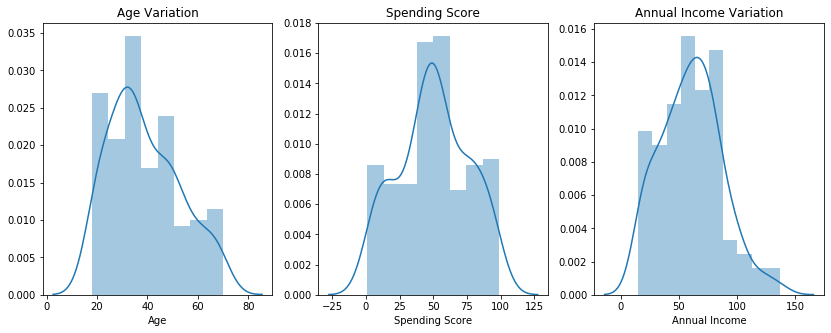

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(mall_df['Age'])
plt.title('Age Variation')
plt.xlabel('Age')

plt.subplot(1,3,2)
sns.distplot(mall_df['Spending Score (1-100)'])
plt.title('Spending Score')
plt.xlabel('Spending Score')

plt.subplot(1,3,3)
sns.distplot(mall_df['Annual Income (k$)'])
plt.title('Annual Income Variation')
plt.xlabel('Annual Income')

### Clusters of Customers Based on their Annual Income and Spending Score.

In [24]:
X = mall_df.iloc[:,[3,4]].values

Text(0, 0.5, 'WCSS')

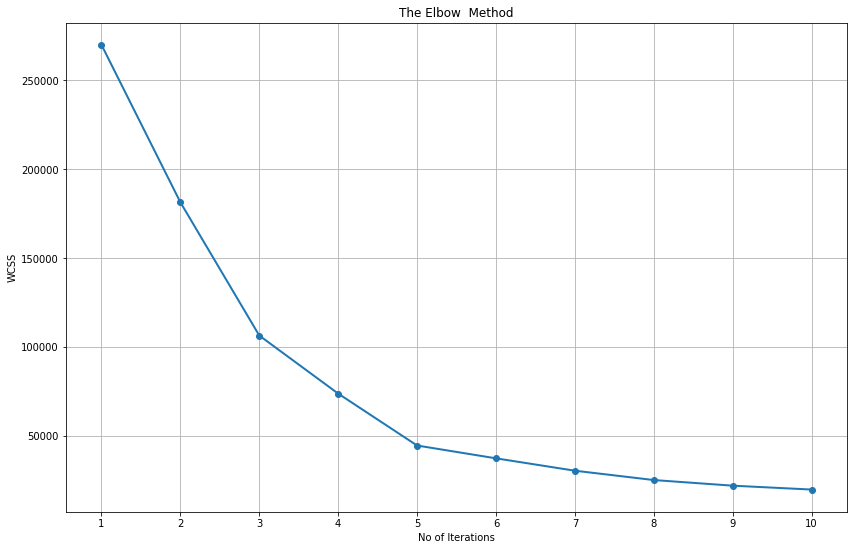

In [25]:
#using elbow method to calculate optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters= i , init = 'k-means++' , max_iter =300 , n_init =10 , random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,9))

plt.plot(range(1,11) , wcss , lw =2 , marker = 'o')
plt.grid()

plt.title('The Elbow  Method')
plt.xticks(np.arange(1,11,1))
plt.xlabel('No of Iterations')
plt.ylabel('WCSS')

In [26]:
#Applying k-means to the mall dataset

kmeans = KMeans(n_clusters= 5 , init = 'k-means++' , random_state= 0)
y_kmeans = kmeans.fit_predict(X)

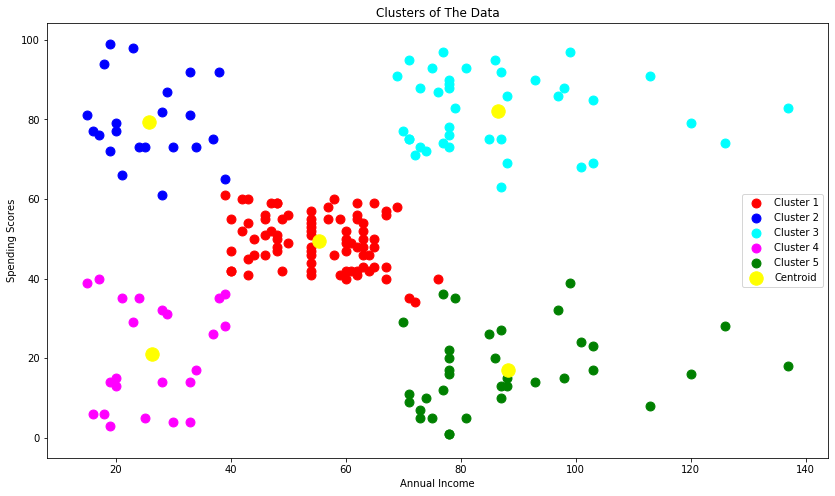

In [27]:
#Visualizing the clusters
plt.figure(figsize = (14,8))
plt.scatter( X[y_kmeans == 0 , 0] , X[y_kmeans == 0 ,1] , s =80 , c ='red' , label ='Cluster 1')
plt.scatter( X[y_kmeans == 1 , 0] , X[y_kmeans == 1 ,1] , s =80 , c ='blue' , label ='Cluster 2')
plt.scatter( X[y_kmeans == 2 , 0] , X[y_kmeans == 2 ,1] , s =80 , c ='cyan' , label ='Cluster 3')
plt.scatter( X[y_kmeans == 3 , 0] , X[y_kmeans == 3 ,1] , s =80 , c ='magenta' , label ='Cluster 4')
plt.scatter( X[y_kmeans == 4 , 0] , X[y_kmeans == 4 ,1] , s =80 , c ='green' , label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:, 1] , s=180 , c = 'yellow' , label = 'Centroid')
plt.title('Clusters of The Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scores')
plt.legend()

### Clusters of Customers Based on their Ages , Annual Income and Spending Score. 

Text(0, 0.5, 'WCSS')

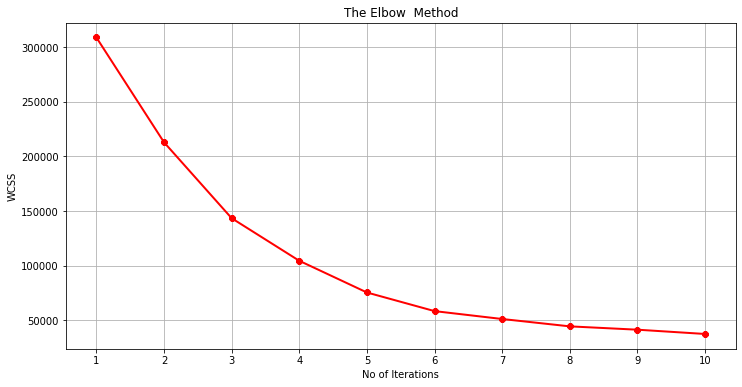

In [28]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(mall_df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title('The Elbow  Method')
plt.xlabel('No of Iterations')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS') 


Text(0.5, 0, 'Spending Score (1-100)')

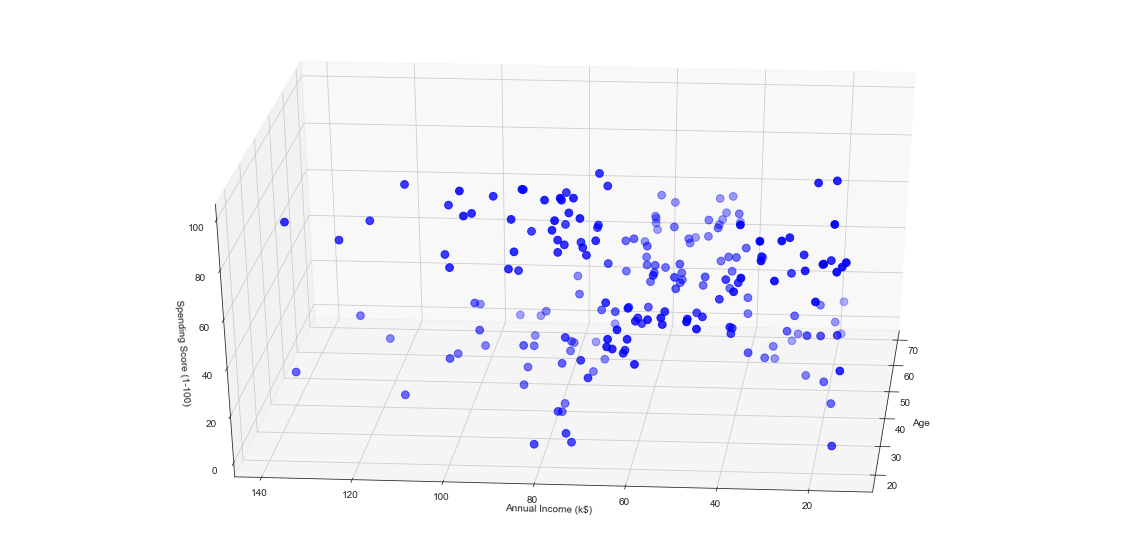

In [30]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mall_df.Age, mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')



Text(0.5, 0, 'Spending Score (1-100)')

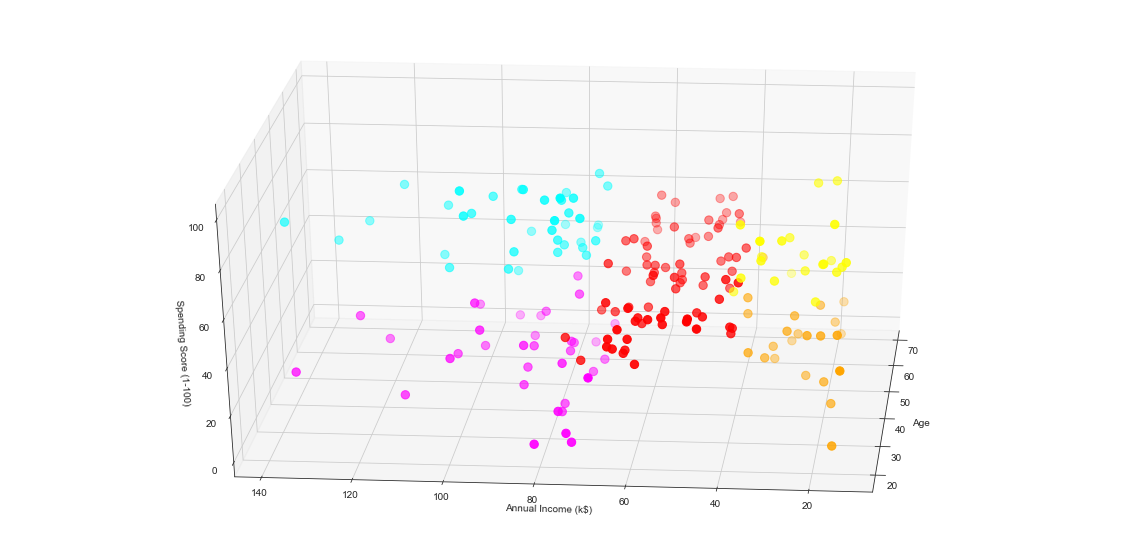

In [31]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mall_df.Age[y_kmeans == 0], mall_df["Annual Income (k$)"][y_kmeans == 0], mall_df["Spending Score (1-100)"][y_kmeans == 0], c='red', s=70)
ax.scatter(mall_df.Age[y_kmeans == 1], mall_df["Annual Income (k$)"][y_kmeans == 1], mall_df["Spending Score (1-100)"][y_kmeans == 1], c='yellow', s=70)
ax.scatter(mall_df.Age[y_kmeans == 2], mall_df["Annual Income (k$)"][y_kmeans == 2], mall_df["Spending Score (1-100)"][y_kmeans == 2], c='cyan', s=70)
ax.scatter(mall_df.Age[y_kmeans == 3], mall_df["Annual Income (k$)"][y_kmeans == 3], mall_df["Spending Score (1-100)"][y_kmeans == 3], c='orange', s=70)
ax.scatter(mall_df.Age[y_kmeans == 4], mall_df["Annual Income (k$)"][y_kmeans == 4], mall_df["Spending Score (1-100)"][y_kmeans == 4], c='magenta', s=70)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

In [32]:
import pickle
Pkl_Filename = "Mall_Customer_Segmentation.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(kmeans, file)